### INTRODUCTION:

#### GOAL OF THIS PROJECT:

* Analyze data on GDP and life expectancy from the World Health Organization and the World Bank data and try and identify the relationship between the GDP and life expectancy of six countries.

#### SOME ASPECTS EXPLORED IN THIS PROJECT:

1. Has life expectancy average increased over the years?
2. Which countries have the largest and lowest life expectancy averages?
3. Which country has the highest increase in life expectancy average?
4. Has average GDP increased over the years?
5. Which country has seen the maximum increase in GDP?
6. Which country has the highest average GDP?

### Import necessary packages

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

### Loading the data

In [2]:
df = pd.read_csv("all_data.csv")

### Exploring the data

In [3]:
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [4]:
df.describe()

,Year,Life expectancy at birth (years),GDP
count,96.000000,96.000000,9.600000e+01
mean,2007.500000,72.789583,3.880499e+12
std,4.633971,10.672882,5.197561e+12
min,2000.000000,44.300000,4.415703e+09
25%,2003.750000,74.475000,1.733018e+11
50%,2007.500000,76.750000,1.280220e+12
75%,2011.250000,78.900000,4.067510e+12
max,2015.000000,81.000000,1.810000e+13


In [5]:
df.shape

(96, 4)

#### Finding missing values and cleaning the data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


There are no missing values. 

In [7]:
df.columns

Index(['Country', 'Year', 'Life expectancy at birth (years)', 'GDP'], dtype='object')

#### Renaming the column name for easy representation

In [8]:
df.rename(columns={"Life expectancy at birth (years)" : "Life_EAB"}, inplace=True)

In [9]:
df.columns

Index(['Country', 'Year', 'Life_EAB', 'GDP'], dtype='object')

#### finding the number of countries

In [10]:
print(df["Country"].unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


There are six countries. 

### LIFE EXPECTANCY

#### Let us find the average life expectancy in each country

In [42]:
d = df[['Country','Life_EAB']].groupby("Country").mean().sort_values(by='Life_EAB').reset_index()
d

,Country,Life_EAB
0,Zimbabwe,50.09375
1,China,74.26250
2,Mexico,75.71875
3,United States of America,78.06250
4,Chile,78.94375
5,Germany,79.65625


#### Visualizing this average life expectancy for each country

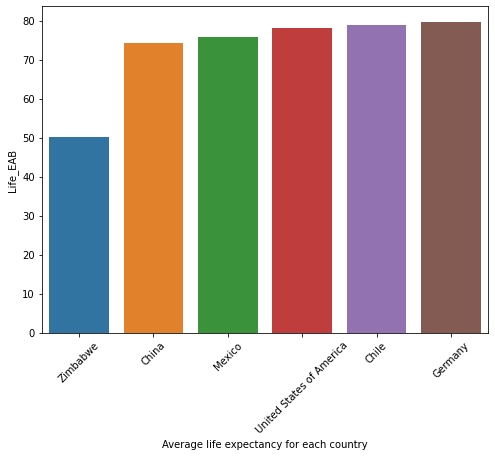

In [12]:
plt.figure(figsize=(8,6))
sns.barplot(x="Country", y="Life_EAB", data=d)
plt.xlabel("Average life expectancy for each country")
plt.xticks(rotation = 45)
plt.show()

#### Now, let us check if the average life expectancy has increased over the time.

In [14]:
yrl = df[['Year','Life_EAB']].groupby('Year').mean().reset_index()
yrl

,Year,Life_EAB
0,2000,70.766667
1,2001,70.833333
2,2002,70.950000
3,2003,71.033333
4,2004,71.300000
5,2005,71.483333
6,2006,71.950000
7,2007,72.300000
8,2008,72.666667
9,2009,73.066667


#### Visualizing the life expectancy over years

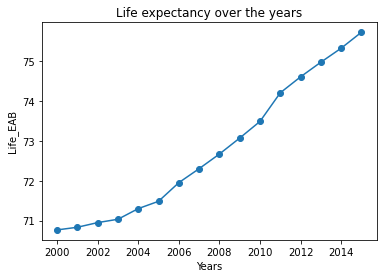

In [15]:
plt.plot('Year', 'Life_EAB', data=yrl, marker = 'o')
plt.title("Life expectancy over the years")
plt.xlabel("Years")
plt.ylabel("Life_EAB")
plt.show()

#### Let us see if the life expectancy has increased for each country

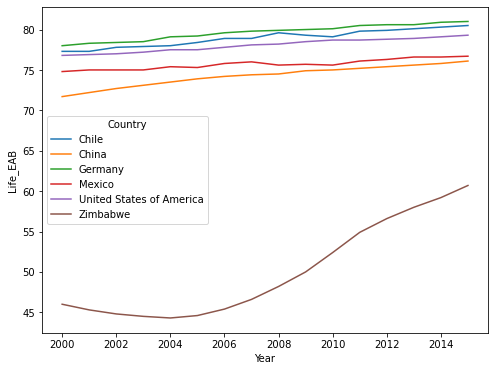

In [29]:
plt.figure(figsize=(8,6))
sns.lineplot(x=df.Year, y=df.Life_EAB, hue =df.Country)
plt.show()

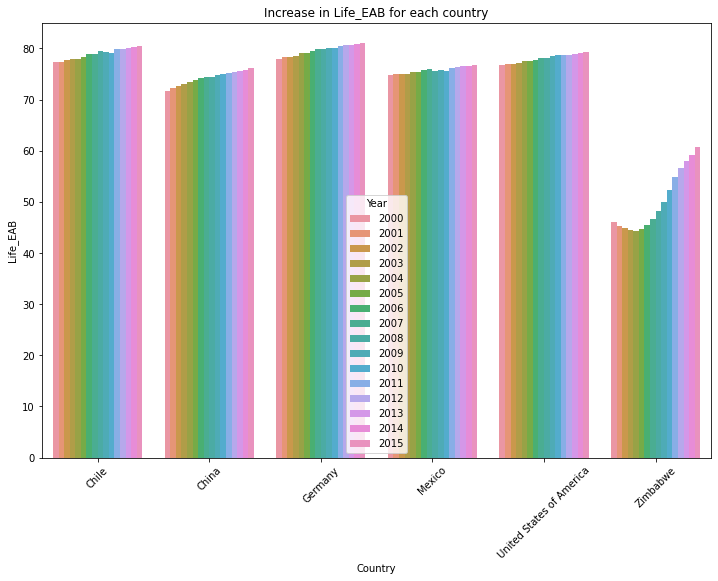

In [39]:
plt.figure(figsize=(12,8))
sns.barplot(x="Country", y="Life_EAB", data=df, hue='Year')
plt.title("Increase in Life_EAB for each country")
plt.xticks(rotation = 45)
plt.show()

### GDP

#### Let us find the average GDP in each country

In [43]:
g = df[['Country','GDP']].groupby("Country").mean().sort_values(by='GDP').reset_index()
g

,Country,GDP
0,Zimbabwe,9.062580e+09
1,Chile,1.697888e+11
2,Mexico,9.766506e+11
3,Germany,3.094776e+12
4,China,4.957714e+12
5,United States of America,1.407500e+13


#### Visualizing this average GDP for each country

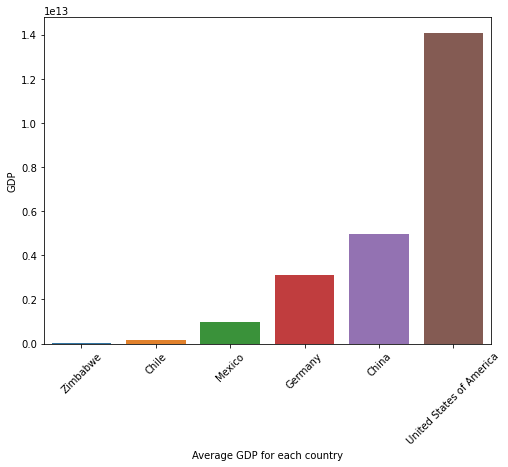

In [45]:
plt.figure(figsize=(8,6))
sns.barplot(x="Country", y="GDP", data=g)
plt.xlabel("Average GDP for each country")
plt.xticks(rotation = 45)
plt.show()

#### Now, let us check if the average GDP has increased over the time.

In [40]:
yr2 = df[['Year','GDP']].groupby('Year').mean().reset_index()
yr2

,Year,GDP
0,2000,2.371583e+12
1,2001,2.448752e+12
2,2002,2.561221e+12
3,2003,2.743446e+12
4,2004,2.991647e+12
5,2005,3.207074e+12
6,2006,3.463349e+12
7,2007,3.785750e+12
8,2008,4.055986e+12
9,2009,4.000653e+12


#### Visualizing the GDP over years

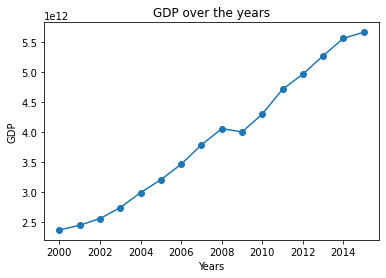

In [41]:
plt.plot('Year', 'GDP', data=yr2, marker = 'o')
plt.title("GDP over the years")
plt.xlabel("Years")
plt.ylabel("GDP")
plt.show()

#### Let us see if the GDP has increased for each country

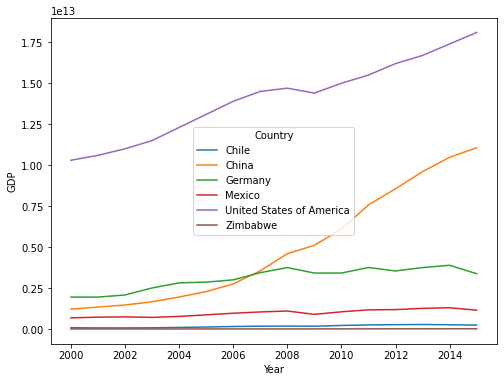

In [46]:
plt.figure(figsize=(8,6))
sns.lineplot(x=df.Year, y=df.GDP, hue =df.Country)
plt.show()

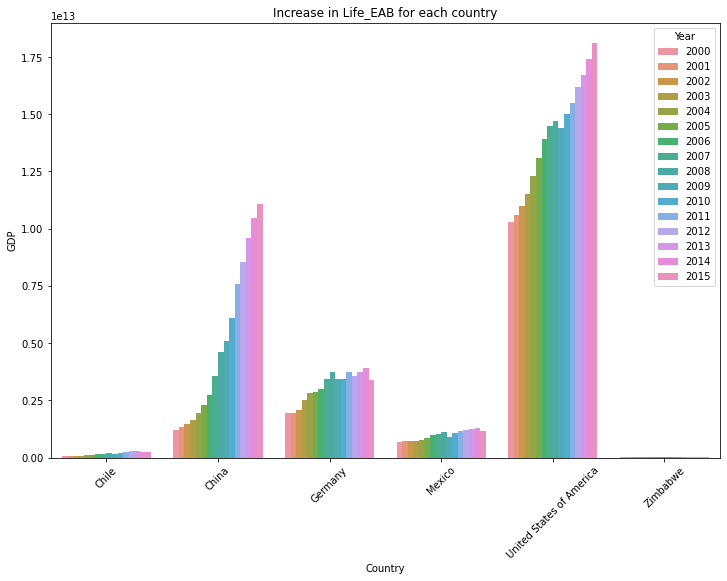

In [47]:
plt.figure(figsize=(12,8))
sns.barplot(x="Country", y="GDP", data=df, hue='Year')
plt.title("Increase in Life_EAB for each country")
plt.xticks(rotation = 45)
plt.show()

### OBSERVATIONS:


#### 1. Has life expectancy average increased over the years?
    * yes, life expectancy has increased over the years.

#### 2. Which countries have the largest and lowest life expectancy averages?
    * Zimbabwe has the lowest average life expectancy
    * Germany has largest average life expectancy

#### 3. Which country has the highest increase in life expectancy average?
    * Zimbabwe has the highest increase in life expectancy over the years.

#### 4. Has average GDP increased over the years?
    * The GDP has increased over the years. Around 2008 and 2009 a slight downfall has been noticed.

#### 5. Which country has seen the maximum increase in GDP?
    * China has seen a significant increase in GDP more than the other countries.
    
#### 6. Which country has the highest average GDP?
    * United States of America has the highest average GDP.
